In [9]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [10]:
data_train = pd.read_csv("Google_Stock_Price_Train.csv")

In [11]:
data_train.shape

(1258, 6)

In [12]:
vr_open = data_train["Open"].values.reshape(-1, 1)

In [13]:
scaler = MinMaxScaler()
vr_open_scaled = scaler.fit_transform(vr_open)

In [14]:
X_train = [] # va correspondre aux entrées : 60 timesteps
y_train = []

In [15]:
for i in range(60, 1258):
    X_train.append(vr_open_scaled[i-60:i, 0])
    y_train.append(vr_open_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [18]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [33]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0458
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0071
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0061
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0054
Epoch 5/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0045
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==============================] - 4s 4ms/step - lo

In [35]:
# Making the predictions and visualising the results
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((data_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

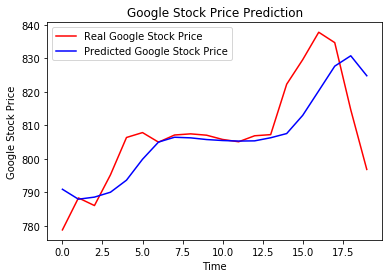

In [36]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()